In [1]:
import time
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sys
import pickle
import torch
from torch import nn, optim
from torchvision import transforms
from collections import OrderedDict
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


cpu


In [2]:
pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
scaler1 = MinMaxScaler()  
scaler2 = MinMaxScaler()  
no_of_output_nodes = 1

df_1 = pd.read_excel('DSF data.xlsx','Sheet1')  #TEMP PCF TRAIN.xlsx  temp_data
datafile_1 = df_1.values                  ## stored data from xlsx file
print(datafile_1)
print(df_1.shape)
sheets = ['Sheet2', 'Sheet3', 
                'Sheet4', 'Sheet5',
                'Sheet6', 'Sheet8', 'Sheet9']
# sheets_names = []
for sheet_name in sheets:
    print(sheet_name)
    df_sheet_name = pd.read_excel('DSF data.xlsx', sheet_name)
    datafile_sheet_name = df_sheet_name.values                  ## stored data from xlsx file
    #print(datafile_sheet_name)
    #########    combining data from all sheets of excel file    #########
    datafile_1 = np.concatenate((datafile_1, datafile_sheet_name), axis=0)

print(datafile_1.shape)
#print()
########   just to see output variable values   ##########
out_var_datafile_1 = datafile_1[:,range(1,2)]              ## stored output_variable (4th column) from xlsx file
out_var_datafile_1 = out_var_datafile_1.reshape((-1,no_of_output_nodes))    ## one column with unknown no. of rows
#print(out_var_datafile_1)
print('no. of training points: ', len(out_var_datafile_1))





[[ 1.00000000e+00  1.70000000e+01  2.00000000e+00  2.60000000e+01
  -8.93514148e-01]
 [ 2.00000000e+00  1.70000000e+01  2.00000000e+00  2.60100000e+01
  -8.93357904e-01]
 [ 3.00000000e+00  1.70000000e+01  2.00000000e+00  2.60150000e+01
  -8.93204131e-01]
 ...
 [ 1.48910000e+04  1.70000000e+01  2.00000000e+00  2.60150000e+01
  -8.87039143e-01]
 [ 1.48920000e+04  1.70000000e+01  2.00000000e+00  2.60100000e+01
  -8.87267666e-01]
 [ 1.48930000e+04  1.70000000e+01  2.00000000e+00  2.60000000e+01
  -8.87505702e-01]]
(14893, 5)
Sheet2
Sheet3
Sheet4
Sheet5
Sheet6
Sheet8
Sheet9
(119144, 5)
no. of training points:  119144


In [4]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-manylinux2010_x86_64.whl (497.6 MB)
  Using cached wrapt-1.13.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (84 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.1 MB)
  Using cached libclang-13.0.0-py2.py3-none-manylinux1_x86_64.whl (14.5 MB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.44.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.

In [5]:
!pip install keras

In [6]:
#Import library and dependencies
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.regularizers import l2, l1
from sklearn.utils import class_weight
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import numpy as np

2022-03-07 08:32:04.629420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 08:32:04.629459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
import pandas as pd
scaler1.fit(datafile_1)
scaler2.fit(datafile_1)
scaler_datafile_1 = scaler1.transform(datafile_1)
xtrain  =scaler_datafile_1[:,0:4]
ytrain = scaler_datafile_1[:,4:5]
dataframe1 = pd.DataFrame(xtrain)
dataframe2 = pd.DataFrame(ytrain)
original = pd.concat([dataframe1, dataframe2], axis=1)


In [8]:
#Autoencoder model
from keras.models import Model
from keras.layers import Dense, Input
start_time = time.time()
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Autoencoder model with denoising model
from keras.models import Model
from keras.layers import Dense, Input
start_time = time.time()
from keras import models
from keras import layers
from tensorflow import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
input = Input(shape=(5,))

encoded = layers.Dense(64, activation='relu')(input)
encoded = layers.Dense(12, activation='relu')(encoded)
decoded = layers.Dense(12, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)

decoded = layers.Dense(5, activation='sigmoid')(decoded)
autoencoder=Model(input, decoded)
encoder = Model(input, encoded)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

history = autoencoder.fit(original,original, epochs=50, batch_size=256) #, validation_data=(originalval, originalval))
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))

2022-03-07 08:32:06.952742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-07 08:32:06.952790: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-07 08:32:06.952823: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-5fe83f23338291001a17ec35): /proc/driver/nvidia/version does not exist
2022-03-07 08:32:06.953071: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


466/466 [==============================] - 2s 4ms/step - loss: 0.0191 - accuracy: 0.8379
end_time:  1646641929.4933488
time taken to train in sec:  2.5610158443450928


In [9]:
augmented = autoencoder.predict(original)
#augmentedval = autoencoder.predict(originalval)
Xaugtrain1000 = augmented[:,range(0,4)]
yaugtrain1000 = augmented[:,range(4,5)]
#Xaugval1000 = augmentedval[:,range(0,12)]
#yaugval1000 = augmentedval[:,range(12,17)]

In [10]:

%matplotlib inline
input = Input(shape=(5,))
#encoded = layers.Dense(1470, activation='relu')(input)
#encoded = layers.Dense(512, activation='relu')(input)
#encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
#decoded = layers.Dense(128, activation='relu')(decoded)
#decoded = layers.Dense(512, activation='relu')(decoded)
#decoded = layers.Dense(1470, activation='relu')(decoded)
decoded = layers.Dense(5, activation='sigmoid')(decoded)
autoencoder1=Model(input, decoded)
encoder = Model(input, encoded)
opt = keras.optimizers.Adam(learning_rate=0.01)
autoencoder1.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
#autoencoder.summary()
#Augment the X_train dataset 
history = autoencoder1.fit(original,original, epochs=50, batch_size=256) #, validation_data=(originalval, originalval))
end_time = time.time()
print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))

Epoch 1/50
466/466 [==============================] - 4s 7ms/step - loss: 0.0077 - accuracy: 0.8807
Epoch 2/50
466/466 [==============================] - 3s 6ms/step - loss: 2.6054e-04 - accuracy: 0.9207
Epoch 3/50
466/466 [==============================] - 3s 6ms/step - loss: 1.6361e-04 - accuracy: 0.9179
Epoch 4/50
466/466 [==============================] - 3s 6ms/step - loss: 1.0826e-04 - accuracy: 0.9325
Epoch 5/50
466/466 [==============================] - 3s 7ms/step - loss: 9.0388e-05 - accuracy: 0.9654
Epoch 6/50
466/466 [==============================] - 3s 6ms/step - loss: 7.2340e-05 - accuracy: 0.9726
Epoch 7/50
466/466 [==============================] - 3s 6ms/step - loss: 7.5176e-05 - accuracy: 0.9736
Epoch 8/50
466/466 [==============================] - 3s 6ms/step - loss: 5.5801e-05 - accuracy: 0.9706
Epoch 9/50
466/466 [==============================] - 3s 6ms/step - loss: 5.6716e-05 - accuracy: 0.9688
Epoch 10/50
466/466 [==============================] - 3s 6ms/step -

In [11]:
augmented1 = autoencoder1.predict(original)
#augmentedval = autoencoder.predict(originalval)
Xaugtrain10001 = augmented1[:,range(0,4)]
yaugtrain10001 = augmented1[:,range(4,5)]
#Xaugval1000 = augmentedval[:,range(0,12)]
#yaugval1000 = augmentedval[:,range(12,17)]

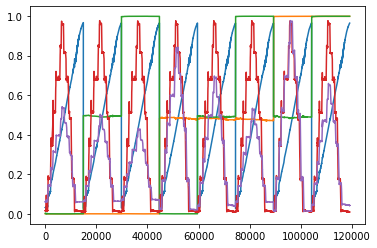

In [17]:
plt.plot(augmented[:])

In [12]:
originalappended = np.concatenate([original, augmented, augmented1], axis=0)

In [13]:
print(originalappended.shape)

(357432, 5)


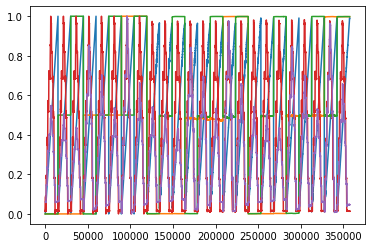

In [20]:
plt.plot(originalappended[:])

In [14]:
xtrain11  =originalappended[:,0:4]
ytrain11 = originalappended[:,4:5]
from scipy import signal
ytrainsmall = signal.resample_poly(ytrain11, 100, 15000)
xtrainsmall = signal.resample_poly(xtrain11, 100, 15000)

In [22]:
print(xtrainsmall.shape)

(2383, 4)


In [23]:
X1 = (xtrainsmall)[:,3]

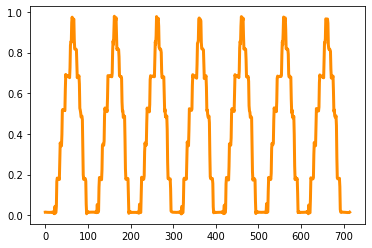

In [24]:
plt.plot(X1[1668:],'darkorange',linewidth=3)

In [15]:
pip install pennylane

  Using cached PennyLane-0.21.0-py3-none-any.whl (800 kB)
  Using cached autograd-1.3-py3-none-any.whl
  Using cached PennyLane_Lightning-0.21.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
  Using cached semantic_version-2.6.0-py3-none-any.whl (14 kB)
  Using cached autoray-0.2.5-py3-none-any.whl (16 kB)
  Using cached ninja-1.10.2.3-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (108 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
!pip install tensorflow

In [17]:
import tensorflow as tf

In [18]:
pip install PennyLane-Forest

  Using cached PennyLane_Forest-0.20.0-py3-none-any.whl (27 kB)
  Using cached pyquil-2.28.2-py3-none-any.whl
  Using cached lark-1.1.2-py2.py3-none-any.whl (104 kB)
  Using cached rpcq-3.9.2-py3-none-any.whl
  Using cached immutables-0.6-cp38-cp38-linux_x86_64.whl
  Using cached msgpack-0.6.2-cp38-cp38-linux_x86_64.whl
  Using cached python_rapidjson-1.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.6 MB)
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.3
    Uninstalling msgpack-1.0.3:
      Successfully uninstalled msgpack-1.0.3
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install pyquil==2.28.2

Note: you may need to restart the kernel to use updated packages.


In [20]:
!pip install pennylane-forest

In [21]:
from pyquil.api import WavefunctionSimulator

In [22]:
import pennylane as qml

/opt/conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [23]:
n_qubits =4
dev = qml.device("default.qubit", wires=n_qubits, shots = 1500)
#dev = qml.device('forest.wavefunction', wires=n_qubits, shots = 500)
#dev = qml.device('forest.numpy_wavefunction', wires=n_qubits, shots = 1500)
#dev = qml.device('forest.qvm', device='2q-pyqvm', shots=1500) #running but 2 qubit model only


In [24]:
@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

In [25]:
tf.keras.backend.set_floatx('float64')

In [26]:
n_layers = 4
weight_shapes = {"weights": (n_layers, n_qubits)}

In [27]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

In [28]:
def r_square(y_true, y_pred):
    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [30]:
from tensorflow.keras import backend as K

In [31]:
import time
start_time = time.time()
clayer_1 = tf.keras.layers.Dense(2)
clayer_10 = tf.keras.layers.Dense(100, activation="relu")
clayer_11 = tf.keras.layers.Dense(100, activation="relu")
clayer_12 = tf.keras.layers.Dense(100, activation="relu")
clayer_2 = tf.keras.layers.Dense(1) #, activation="linear"
model = tf.keras.models.Sequential([clayer_1, qlayer, clayer_10, clayer_11, clayer_12, clayer_2]) #clayer_11, clayer_12,
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
from tensorflow.keras.metrics import Metric
#model.compile(optimizer='sgd', loss="mse", metrics=[tf.keras.metrics.CosineSimilarity( name="cosine_similarity", dtype=None, axis=-1)])
#model.compile(opt, loss="mae", metrics=[tf.keras.metrics.RootMeanSquaredError()]) #(tf.keras.metrics.MeanSquaredError(name="mean_squared_error", dtype=None))
model.compile(opt, loss="mae", metrics=['mse',r_square,tf.keras.metrics.CosineSimilarity( name="cosine_similarity", dtype=None, axis=-1)])
#model.compile(opt, loss="mae", metrics=['mse',r_square,tf.keras.losses.Huber()])
#model.compile(optimizer='sgd', loss="mae", metrics=['mse',r_square])
#model.compile(opt, loss="mae", metrics=tf.keras.losses.Huber())
#history = model.fit(X, y_hot, epochs=5, batch_size=5, validation_split=0.25, verbose=2)
history = model.fit(xtrainsmall,ytrainsmall, epochs=1, batch_size=128, validation_split=0.25, verbose=2)#, validation_data = (xtrainsmall[1300:],ytrainsmall[1300:]),verbose=2)
end_time = time.time()
#print('end_time: ', end_time)
print('time taken to train in sec: ', (end_time - start_time))
history_dict = history.history
history_dict.keys()


# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 
# or save to csv: 
hist_csv_file = 'QReg5Qu100Shot2Qulaytrain.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

14/14 - 283s - loss: 0.1561 - mse: 0.0418 - r_square: 0.0348 - cosine_similarity: 1.0000 - val_loss: 0.1357 - val_mse: 0.0255 - val_r_square: 0.2470 - val_cosine_similarity: 1.0000 - 283s/epoch - 20s/step
time taken to train in sec:  282.58830213546753


In [32]:
from keras.models import load_model
#model.save(SAVE_PATH +"modelQReg5Qu100Shot2Qulaytrain.h5")
import joblib
filename = 'modelQReg5Qu500Shot3Qulaytrain.model'
joblib.dump(model, filename)
print("Saved model to disk")

Traceback (most recent call last):
  Input In [32] in <cell line: 5>
    joblib.dump(model, filename)
  File /opt/conda/lib/python3.8/site-packages/joblib/numpy_pickle.py:482 in dump
    NumpyPickler(f, protocol=protocol).dump(value)
  File /opt/conda/lib/python3.8/pickle.py:487 in dump
    self.save(obj)
  File /opt/conda/lib/python3.8/site-packages/joblib/numpy_pickle.py:284 in save
    return Pickler.save(self, obj)
  File /opt/conda/lib/python3.8/pickle.py:578 in save
    rv = reduce(self.proto)
  File /opt/conda/lib/python3.8/site-packages/keras/engine/training.py:315 in __reduce__
    pickle_utils.serialize_model_as_bytecode(self))
  File /opt/conda/lib/python3.8/site-packages/keras/saving/pickle_utils.py:64 in serialize_model_as_bytecode
    model.save(temp_dir)
  File /opt/conda/lib/python3.8/site-packages/keras/utils/traceback_utils.py:67 in error_handler
    raise e.with_traceback(filtered_tb) from None
  File /opt/conda/lib/python3.8/site-packages/tensorflow/python/framework

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mse', 'r_square', 'cosine_similarity', 'val_loss', 'val_mse', 'val_r_square', 'val_cosine_similarity'])

/tmp/ipykernel_59/3598882998.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayLossplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/3598882998.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayLossplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/3598882998.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayLossplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')


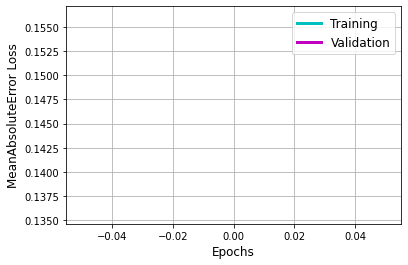

In [35]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['loss'],'c-', linewidth=3)
plt.plot(history.history['val_loss'],'m-', linewidth=3)
plt.grid(True)
#plt.title('ORPN Model Loss', fontsize=12)
plt.ylabel('MeanAbsoluteError Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training', 'Validation'], loc='best', fontsize=12)
#plt.savefig('Autoencoder Model Loss.png', dpi=300)
plt.savefig("QReg5Qu500Shot3QulayLossplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
#plt.savefig(SAVE_PATH + "QReg5Qu100Shot2QulayLossplot.png")
plt.show()


/tmp/ipykernel_59/2996017724.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayMSEplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/2996017724.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayMSEplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/2996017724.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayMSEplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')


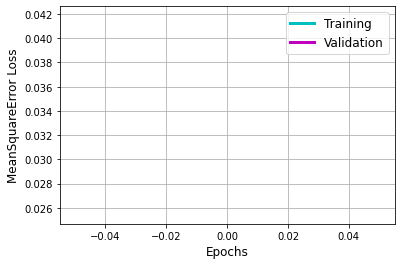

In [36]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['mse'],'c-', linewidth=3) #cosine_similarity val_cosine_similarity
plt.plot(history.history['val_mse'],'m-', linewidth=3)
plt.grid(True)
#plt.title('ORPN Model Loss', fontsize=12)
plt.ylabel('MeanSquareError Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training', 'Validation'], loc='best', fontsize=12)
plt.savefig("QReg5Qu500Shot3QulayMSEplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
#plt.savefig(SAVE_PATH + "QReg5Qu100Shot2QulayMSEplot.png")
plt.show()

/tmp/ipykernel_59/2368346379.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayCosineplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/2368346379.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayCosineplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
/tmp/ipykernel_59/2368346379.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "progressive" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("QReg5Qu500Shot3QulayCosineplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')


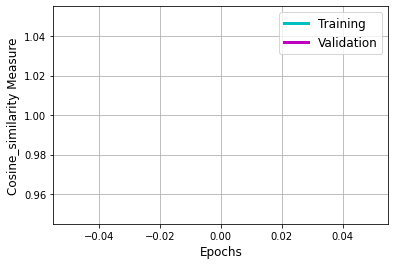

In [37]:
# summarize history for MSE Loss
fig1 = plt.gcf()
plt.plot(history.history['cosine_similarity'],'c-', linewidth=3) #cosine_similarity val_cosine_similarity
plt.plot(history.history['val_cosine_similarity'],'m-', linewidth=3)
plt.grid(True)
#plt.title('ORPN Model Loss', fontsize=12)
plt.ylabel('Cosine_similarity Measure', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.legend(['Training', 'Validation'], loc='best', fontsize=12)
plt.savefig("QReg5Qu500Shot3QulayCosineplot.png", dpi=300, quality=80, optimize=True, progressive=True, bbox_inches='tight')
#plt.savefig(SAVE_PATH + "QReg5Qu100Shot2QulayR2plot.png")
plt.show()

In [87]:
Ypredictiontrain100 = model.predict(xtrainsmall[1688:1778])

In [38]:
HQCNNReg= model.predict(xtrainsmall[1688:1778])

In [40]:
from sklearn.metrics import r2_score
R = r2_score(ytrainsmall[1688:1778], HQCNNReg)
print('R2 score for 50 Epochs: %.3f' % R) # Best should be 1

R2 score for 50 Epochs: 0.795


In [41]:
 from sklearn.metrics import explained_variance_score
 V = explained_variance_score(ytrainsmall[1688:1778], HQCNNReg)
 print('Variance score for 50 Epochs: %.3f' % V) # Best should be 1

Variance score for 50 Epochs: 0.847


In [42]:
from sklearn.metrics import max_error
E = max_error(ytrainsmall[1688:1778], HQCNNReg)
print('Maximum error for 50 Epochs: %.3f' % E) # Best should be 0

Maximum error for 50 Epochs: 0.161


In [44]:
a = scaler1.fit(ytrainsmall[1688:1778])

In [45]:
y01 = scaler1.inverse_transform(ytrainsmall[1688:1778])


In [46]:

y03 = scaler1.inverse_transform(HQCNNReg[:])

In [49]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(xtrainsmall[:1668], np.ravel(ytrainsmall[:1668],order='C'))

SVR()

In [114]:
SVRPred = regressor.predict(xtrainsmall[1688:1778])

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [52]:
SVRPred1 = regressor.predict(xtrainsmall[1668:])

In [53]:
r2_score(SVRPred1,ytrainsmall[1668:])

0.919392870595171

In [54]:
 from sklearn.metrics import explained_variance_score
 explained_variance_score(SVRPred1,ytrainsmall[1668:])

0.942224888127076

In [55]:
from sklearn.metrics import max_error
max_error(SVRPred1,ytrainsmall[1668:])

0.16912962314134167

In [ ]:
RFPred = rf.predict(xtrainsmall[1688:1778])

In [67]:
RFPred1 = rf.predict(xtrainsmall[1688:])

In [68]:
r2_score(RFPred1,ytrainsmall[1688:])

0.6846045605178268

In [69]:
 from sklearn.metrics import explained_variance_score
 explained_variance_score(RFPred1,ytrainsmall[1688:])

0.6863226507313966

In [70]:
from sklearn.metrics import max_error
max_error(RFPred1,ytrainsmall[1688:])

0.42861805225642163

In [72]:
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor(random_state=0)

In [73]:
DT.fit(xtrainsmall[:1668], np.ravel(ytrainsmall[:1668]))

DecisionTreeRegressor(random_state=0)

In [ ]:
DTPred = DT.predict(xtrainsmall[1688:1778])

In [77]:
DTPred1 = DT.predict(xtrainsmall[1688:])

In [78]:
r2_score(DTPred1,ytrainsmall[1688:])

0.9828608100170013

In [79]:
 from sklearn.metrics import explained_variance_score
 explained_variance_score(DTPred1,ytrainsmall[1688:])

0.983152641780003

In [80]:
from sklearn.metrics import max_error
max_error(DTPred1,ytrainsmall[1688:])

0.16876336829678096

In [83]:
import pandas as pd
import matplotlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
np.seterr(all='warn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [84]:
from tensorflow.keras import backend as K

In [85]:
def r_square(y_true, y_pred):
    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [86]:
model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu',
                    name='main_input'))
model.add(Dense(10,activation='relu',name='layer_1'))
model.add(Dense(20,activation='relu',
                    name='layer_2'))
    
model.add(Dense(40,activation='relu'
                    ,name='layer_3'))
model.add(Dense(10,activation='relu',
                    name='layer_4'))

model.add(Dense(1,name='layer_output'))



adam = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=adam,metrics=['mse','mae',r_square])

callbacks = [
    EarlyStopping(
        monitor='val_loss', 
        patience=5500,
        mode='min',verbose=1),
    ModelCheckpoint('assets/ann_model.h5',
        monitor='val_r_square', 
        save_best_only=True, 
        mode='max',verbose=2)]

hist = model.fit(xtrainsmall[:1668],ytrainsmall[:1668],epochs=5,callbacks=callbacks,batch_size=32,validation_data=(xtrainsmall[1668:],ytrainsmall[1668:])
               ,shuffle=True)

Epoch 1/5
46/53 [=========================>....] - ETA: 0s - loss: 0.0733 - mse: 0.0733 - mae: 0.2070 - r_square: -0.6476
Epoch 1: val_r_square improved from -inf to -1122.91460, saving model to assets/ann_model.h5
53/53 [==============================] - 2s 22ms/step - loss: 0.0685 - mse: 0.0685 - mae: 0.2012 - r_square: -0.5192 - val_loss: 0.0326 - val_mse: 0.0326 - val_mae: 0.1521 - val_r_square: -1122.9146
Epoch 2/5
52/53 [============================>.] - ETA: 0s - loss: 0.0186 - mse: 0.0186 - mae: 0.1128 - r_square: 0.5727
Epoch 2: val_r_square improved from -1122.91460 to -89.27309, saving model to assets/ann_model.h5
53/53 [==============================] - 0s 8ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.1127 - r_square: 0.5790 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0961 - val_r_square: -89.2731
Epoch 3/5
42/53 [======================>.......] - ETA: 0s - loss: 0.0085 - mse: 0.0085 - mae: 0.0694 - r_square: 0.8044
Epoch 3: val_r_square improved from -89.27309 to -0

In [87]:
ANNPred = model.predict(xtrainsmall[1688:1778])

In [90]:
r2_score(ANNPred,ytrainsmall[1688:1778])

0.9256566512269527

In [91]:
 from sklearn.metrics import explained_variance_score
 explained_variance_score(ANNPred,ytrainsmall[1688:1778])

0.931591023382688

In [92]:
from sklearn.metrics import max_error
max_error(ANNPred,ytrainsmall[1688:1778])

0.17609172793758449

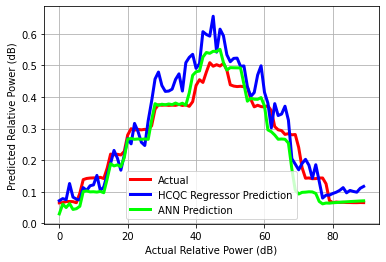

In [97]:
plt.figure()
plt.plot(ytrainsmall[1688:1778],color='red',linewidth=3)
plt.plot(HQCNNReg, color = 'blue',linewidth=3)
plt.plot(ANNPred, color = 'lime',linewidth=3)
#plt.scatter(W, res1,color="green",linewidth=3)
#plt.plot(SVRPred, color = 'cyan',linewidth=3)
#plt.plot(RFPred, color = 'lightpink',linewidth=3)
#plt.plot(DTPred, color = 'lightblue',linewidth=3)


#plt.scatter(X, Y,color="blue")
#plt.scatter(predictions1, Y,color="green")
plt.grid(True)
plt.xlabel("Actual Relative Power (dB)")
plt.ylabel("Predicted Relative Power (dB)")
plt.legend(labels=["Actual", "HCQC Regressor Prediction", "ANN Prediction", "RF Prediction", "DT Prediction", "SVR Prediction"])
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.savefig('SVRPrediction.png', dpi=300)
plt.show()

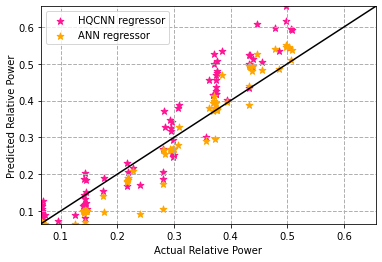

In [113]:
xx = ytrainsmall[1688:1778] #scaler2.inverse_transform(y_train)[0:200,0]
yy = HQCNNReg[:len(xx)] #scaler2.inverse_transform(Ypredictiontrain)[0:200,0]
yy1 = ANNPred[:]
#xx = np.reshape(xx, -1)

bubble_plot_line_x1y1 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]
bubble_plot_line_x2y2 = [min(np.minimum(xx,yy)), max(np.maximum(xx,yy))]



plt.xlim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.ylim(bubble_plot_line_x1y1[0], bubble_plot_line_x1y1[1])
plt.plot(bubble_plot_line_x1y1, bubble_plot_line_x1y1, 'k-', linewidth=1.5)
plt.grid(linestyle='--', linewidth=1)
plt.scatter(xx, yy, label='HQCNN regressor', marker='*', facecolors='', c='deeppink', s=50)
plt.scatter(xx, yy1, label='ANN regressor', marker='*', facecolors='', c='orange', s=50)
plt.legend(loc='best', fontsize=10)

plt.xlabel('Actual Relative Power', fontsize=10)
plt.ylabel('Predicted Relative Power', fontsize=10 ,labelpad=0.8)
#plt.savefig('ActualPredictY1.png', dpi=300,bbox_inches = 'tight')

plt.show()